In [48]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import platform
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

In [49]:
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [50]:
# 아파트 매매,전세 실거래가 평균 데이터 전처리 함수
def pre_col(df):
    
    for i in range(1,6):
        df.drop(f'서울.{i}', axis=1, inplace=True)

    df_column_list = list(df.iloc[0])

    df_column_list[1] = '전국'
    df_column_list[2] = '수도권'
    df_column_list[3] = '지방'
    df_column_list[11] = '세종'

    df.iloc[0] = df_column_list

    addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북': '경상북도', '충북': '충청북도',
                '서울':'서울특별시','부산':'부산광역시','대전':'대전광역시',
                '충남':'충청남도','전남':'전라남도','전북':'전라북도', '대구':'대구광역시',
                '인천':'인천광역시', '광주':'광주광역시', '울산':'울산광역시','세종':'세종특별자치시',
                '강원':'강원도', '제주':'제주특별자치도'}


    df.columns = df.iloc[0].apply(lambda v: addr_aliases.get(v,v))

    df.drop(0, axis=0, inplace=True)

def pre_ind(df):

    df['시점'] = df['시점'].str[:4]

    df.rename(columns={'시점':'연도'}, inplace=True)

def pre_data(df):

    df.replace('-', 0, inplace=True)

    df_column_list = list(df.columns)

    df.iloc[:,1:] = df.iloc[:,1:].astype('float')

    df = round(df.groupby('연도').mean(),1)

    not_need = ['전국', '수도권','지방','인천광역시','세종특별자치시','경기도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도']

    for col in not_need:
        df.drop(col, axis=1, inplace=True)

    df_t = df.T

    df_t['평균'] = round(df_t.mean(axis=1),1)

    df_index_list = list(df_t.index)
    df_t.index = df_index_list


    df_column_list = list(df_t.columns)
    df_t.columns = df_column_list


    return df_t, df_column_list




In [51]:
# 아파트 매매,전세 실거래가 평균 데이터 그래프 함수
def draw_gra(df,name,df_column_list):


    bar_width = 0.12

    price_x = np.arange(0,len(df_column_list)-1)

    plt.figure(figsize=(20,5))
    color_list = ['#ffcccc','#FAECC5','#FAE0D4','#F2CB61','#FAED7D','#FFE08C','#FFC19E', '#FFA7A7']
    country_list = ['서울특별시','부산광역시','대구광역시','광주광역시','대전광역시','울산광역시','제주특별자치도','강원도']
    
    for i in range(8):
        plt.bar(price_x + (bar_width*(i-4)),df.loc[country_list[i]][:-1], bar_width, label=country_list[i], color=color_list[i])

    plt.xlabel('연도')
    plt.ylabel('금액(단위: 만원/㎡)')
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.xticks(np.arange(0, len(df_column_list)-2 + (bar_width*4)), labels = df_column_list[:-1])
    plt.title(name)

    plt.savefig(f'data/{name}.png')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_39536\2332832029.py:39: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1:] = df.iloc[:,1:].astype('float')


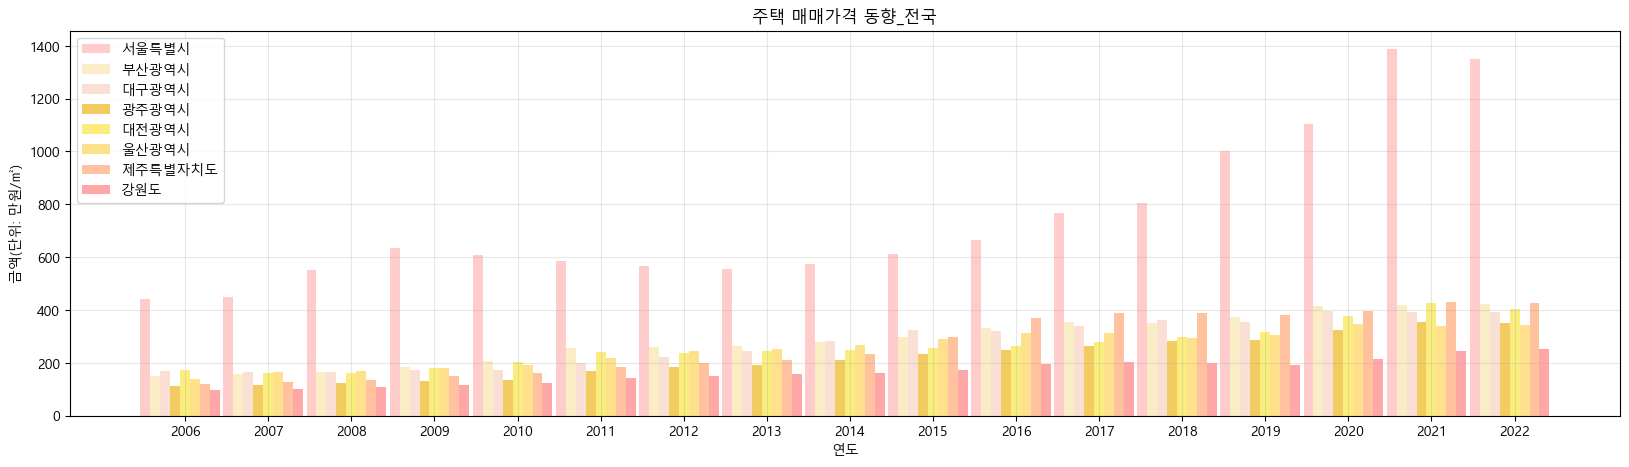

In [52]:
# 아파트 매매 실거래가 평균 데이터
price_df = pd.read_csv('data/아파트_매매_실거래_평균가격_csv.csv', encoding='cp949')

pre_col(price_df)
pre_ind(price_df)
price_df,price_column_list = pre_data(price_df)

price_df.to_csv('data/주택 가격 최종.csv')
draw_gra(price_df, '주택 매매가격 동향_전국',price_column_list)

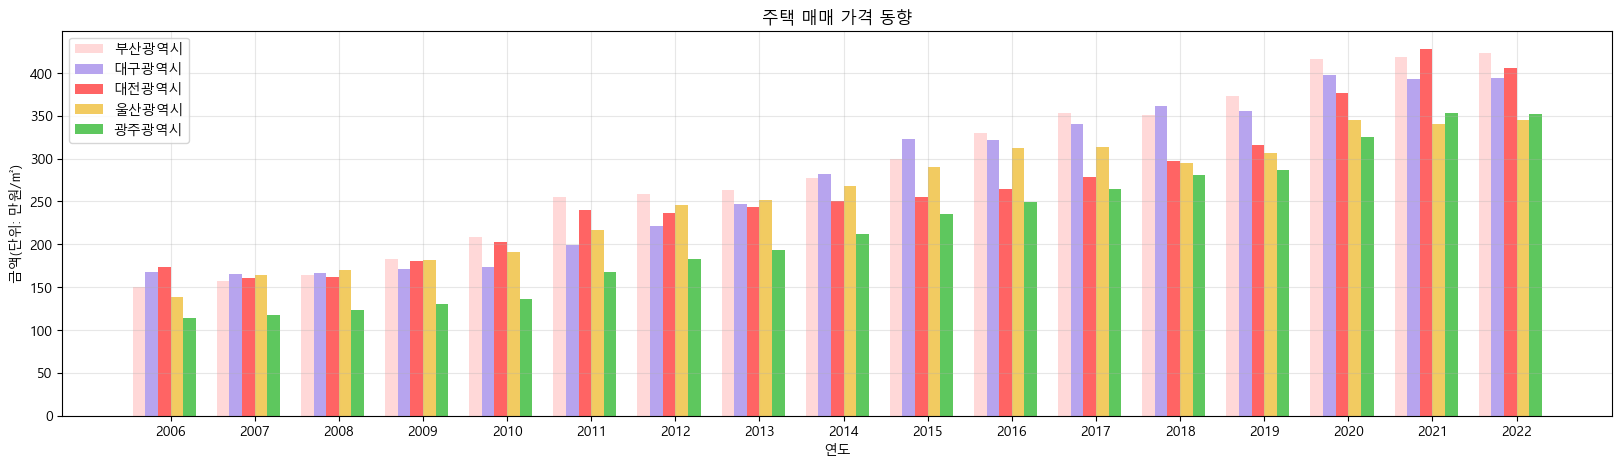

In [53]:
# 아파트 매매 가격 실거래가 평균 5대 광역시
plt.figure(figsize=(20,5))
bar_width = 0.15
price_x = np.arange(0,len(price_column_list)-1)
five_country = ['부산광역시','대구광역시','대전광역시','울산광역시','광주광역시']
color_list = ['#FFD8D8','#b7a4ee','#ff6464','#F2CB61','#5ec75e']
for i in range(5):
    plt.bar(price_x - ((bar_width/2)*(5-(i*2))),price_df.loc[five_country[i]][:-1], bar_width, label=five_country[i], color=color_list[i])

plt.xlabel('연도')
plt.ylabel('금액(단위: 만원/㎡)')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, len(price_column_list)-1 + ((bar_width//2)*7)), labels = price_column_list[:-1])
plt.title('주택 매매 가격 동향')

plt.savefig('data/주택 매매 가격 동향_5대 광역시.png')
plt.show()

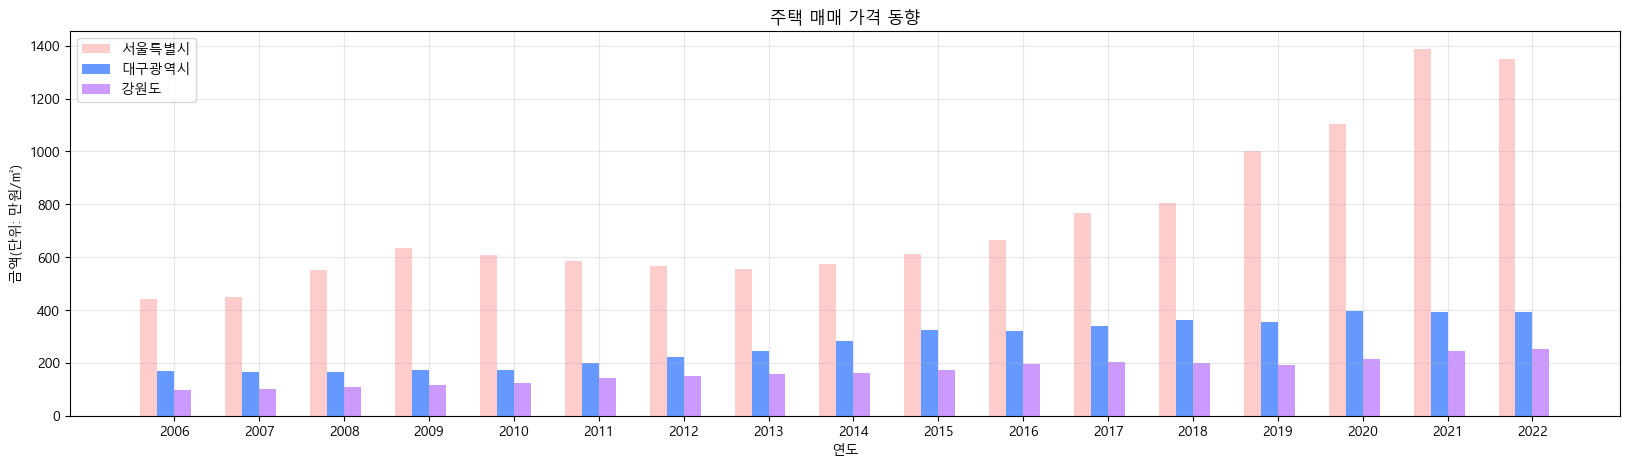

In [54]:
# 아파트 매매 가격 실거래가 평균 서울, 대구, 강원도
plt.figure(figsize=(20,5))
bar_width = 0.2
price_x = np.arange(0,len(price_column_list)-1)

plt.bar(price_x - ((bar_width/2)*3),price_df.loc['서울특별시'][:-1], bar_width, label='서울특별시', color='#ffcccc')

plt.bar(price_x - (bar_width/2),price_df.loc['대구광역시'][:-1] , bar_width, label='대구광역시', color='#6699ff')

plt.bar(price_x + (bar_width/2),price_df.loc['강원도'][:-1] , bar_width, label='강원도', color= '#cc99ff')

plt.xlabel('연도')
plt.ylabel('금액(단위: 만원/㎡)')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, len(price_column_list)-1 + ((bar_width//2)*3)), labels = price_column_list[:-1])
plt.title('주택 매매 가격 동향')

plt.savefig('data/주택 매매 가격 동향_3개 시도.png')
plt.show()

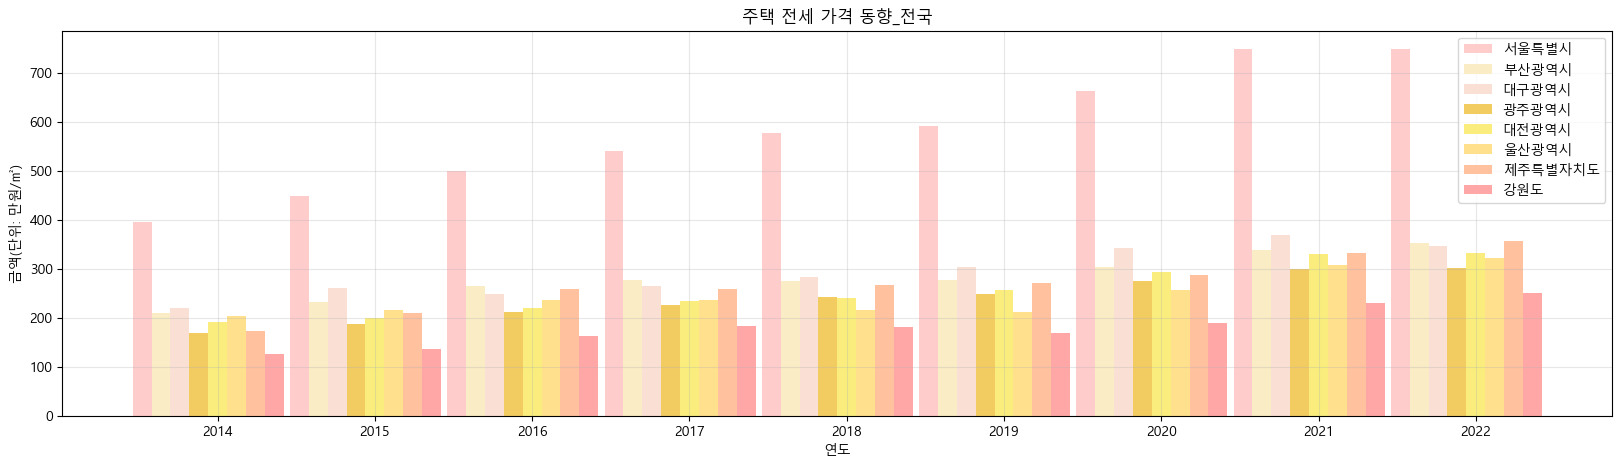

In [55]:
# 아파트 전세 실거래가 평균 데이터
year_df = pd.read_csv('data/아파트_전세_실거래_평균가격.csv', encoding='cp949')
pre_col(year_df)
pre_ind(year_df)
year_df, year_column_list = pre_data(year_df)

year_df.to_csv('data/전세 가격 최종.csv')
draw_gra(year_df, '주택 전세 가격 동향_전국',year_column_list)

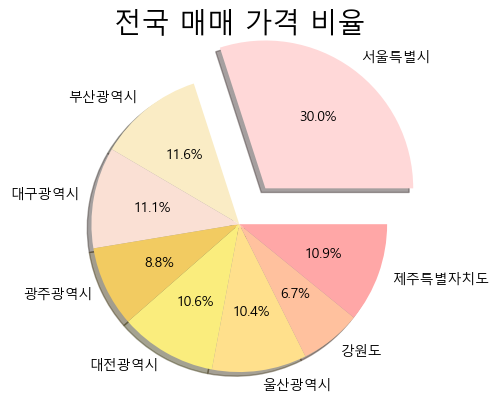

In [56]:
# 전국 매매 가격 비율
color_list = ['#FFD8D8','#FAECC5','#FAE0D4','#F2CB61','#FAED7D','#FFE08C','#FFC19E', '#FFA7A7']
plt.pie(price_df['평균'], labels=list(price_df.index), autopct='%.1f%%', colors=color_list, explode=(0.3,0,0,0,0,0,0,0),shadow=True)
plt.title('전국 매매 가격 비율', fontsize=20)

plt.savefig('data/전국 매매 가격 비율.png')
plt.show()

In [57]:
he_df = pd.merge(price_df['평균'],year_df['평균'], how='inner',left_index=True,	right_index=True)

he_df.columns = ['매매 평균', '전세 평균']

he_df

,매매 평균,전세 평균
서울특별시,744.8,578.8
부산광역시,287.3,281.5
대구광역시,275.3,293.0
광주광역시,219.1,239.8
대전광역시,263.1,255.5
울산광역시,257.4,245.0
강원도,167.1,180.6
제주특별자치도,270.4,268.3


<AxesSubplot: title={'center': '상관계수'}>

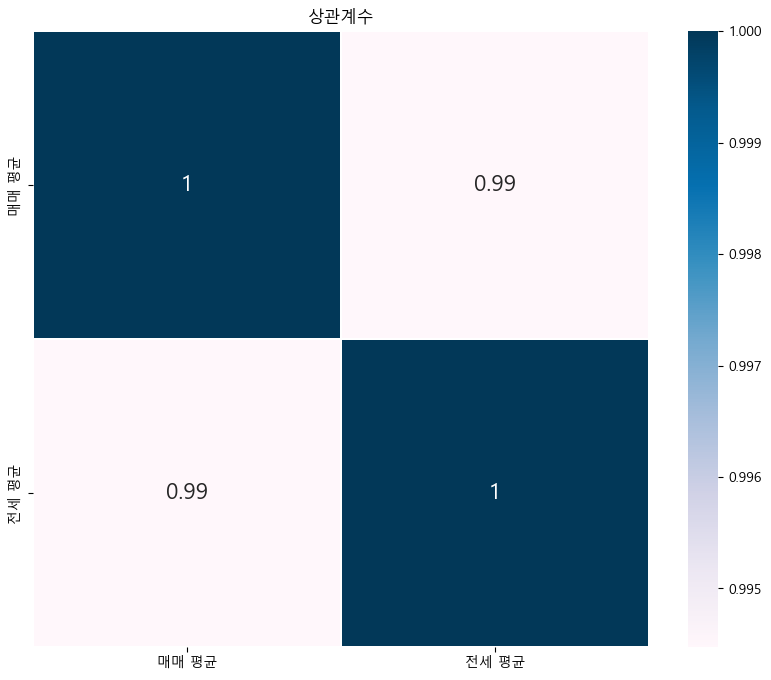

In [58]:
# 매매평균, 전세 평균 heatmap 그래프
colormap = plt.cm.PuBu

plt.figure(figsize=(10,8))
plt.title('상관계수')
sns.heatmap(he_df.corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [59]:
# 매매 가격 대비 전세가격 그래프
def draw_price_year(price_df,year_df, country,num,fig,colors='pink'):

    ax1 = fig.add_subplot(1,3,num)
    plt.bar(year_df.columns[:-1],price_df.loc[country][8:-1], color=colors,label=f'{country} 평균 매매가격')
    plt.plot(year_df.columns[:-1],year_df.loc[country][:-1], 'ro-',label=f'{country} 평균 전세가격')

    plt.xlabel('연도', fontsize=10)
    plt.ylabel('금액(단위: 만원/㎡)', fontsize=10)
    plt.title(f'{country}', fontsize=10)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=8)


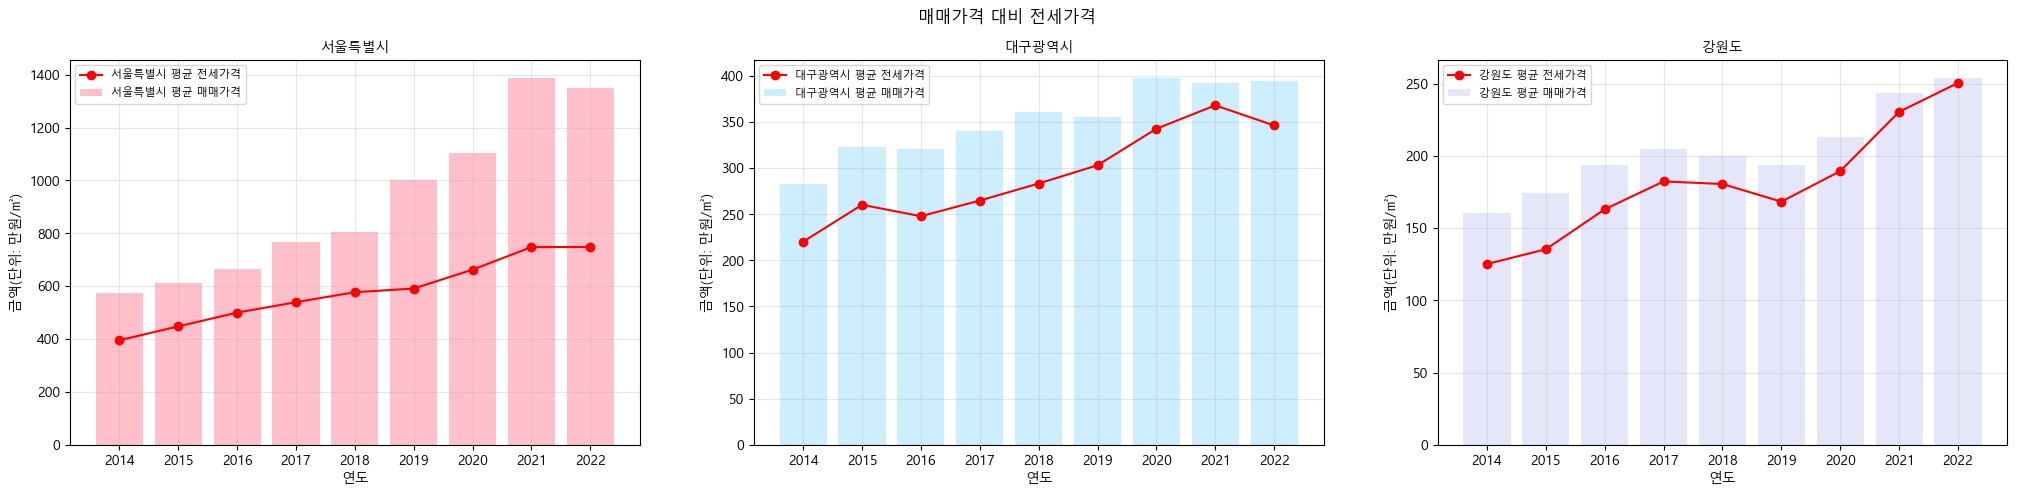

In [60]:
fig = plt.figure(figsize=(25,5))


draw_price_year(price_df,year_df,'서울특별시',1,fig)


draw_price_year(price_df,year_df,'대구광역시',2,fig,'#CCEEFF')


draw_price_year(price_df,year_df,'강원도',3,fig,'#E6E6FA')

plt.suptitle('매매가격 대비 전세가격')

plt.savefig('data/매매가격 대비 전세가격.png')
plt.show()

In [61]:
# 매매가격 대비 전세가격 비율 데이터 전처리
price_year_df = pd.read_csv('data/매매가격_대비_전세가격_비율.csv', encoding='euc-kr')

price_year_df.drop('주택유형별(1)', axis=1, inplace=True)

col_list = ['시점','서울','부산', '대구', '광주', '대전', '울산','강원','제주']

for i in price_year_df.columns:
    if i not in col_list:
        price_year_df.drop(i, axis=1, inplace=True)

price_year_df.drop(0, axis=0, inplace=True)

price_year_df.columns=['시점','서울특별시','부산광역시','대구광역시','광주광역시','대전광역시','울산광역시','강원도','제주특별자치도']

pre_ind(price_year_df)

price_year_df.replace('-', 0, inplace=True)

price_year_df_column_list = list(price_year_df.columns)

price_year_df.iloc[:,1:] = price_year_df.iloc[:,1:].astype('float')

price_year_df = round(price_year_df.groupby('연도').mean(),1)

price_year_df_t = price_year_df.T

price_year_df_t['평균'] = round(price_year_df_t.mean(axis=1),1)

price_year_df_index_list = list(price_year_df_t.index)
price_year_df_t.index = price_year_df_index_list


price_year_df_column_list = list(price_year_df_t.columns)
price_year_df_t.columns = price_year_df_column_list
price_year_df_t


,2014,2015,2016,2017,2018,2019,2020,2021,2022,평균
서울특별시,61.1,63.6,66.1,66.3,66.7,61.5,60.8,60.8,60.1,63.0
부산광역시,67.8,67.9,68.0,67.1,66.0,65.8,65.5,62.7,61.0,65.8
대구광역시,68.6,68.0,67.5,67.6,66.5,65.6,65.8,65.0,65.3,66.7
광주광역시,73.0,73.8,74.9,75.2,73.6,71.0,70.9,70.6,69.6,72.5
대전광역시,66.5,66.9,67.9,68.7,70.3,68.6,65.3,65.5,65.3,67.2
울산광역시,66.9,66.2,65.8,66.3,66.8,64.7,65.6,68.7,70.5,66.8
강원도,58.9,62.4,65.7,66.0,68.6,68.8,68.9,67.6,65.3,65.8
제주특별자치도,63.0,62.9,61.1,62.1,63.1,61.3,61.8,59.9,58.0,61.5


In [62]:
# # 매매가격 대비 전세가격 비율 그래프
def draw_price_year_file(price_year_df,country,num,fig,colors='pink'):

    ax1 = fig.add_subplot(1,3,num)
    plt.bar(price_year_df.columns[:-1],price_year_df.loc[country][:-1], color=colors,label=f'{country} 평균 매매가격')

    plt.xlabel('연도', fontsize=10)
    plt.ylabel('단위:%', fontsize=10)
    plt.title(f'{country}', fontsize=10)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=8)

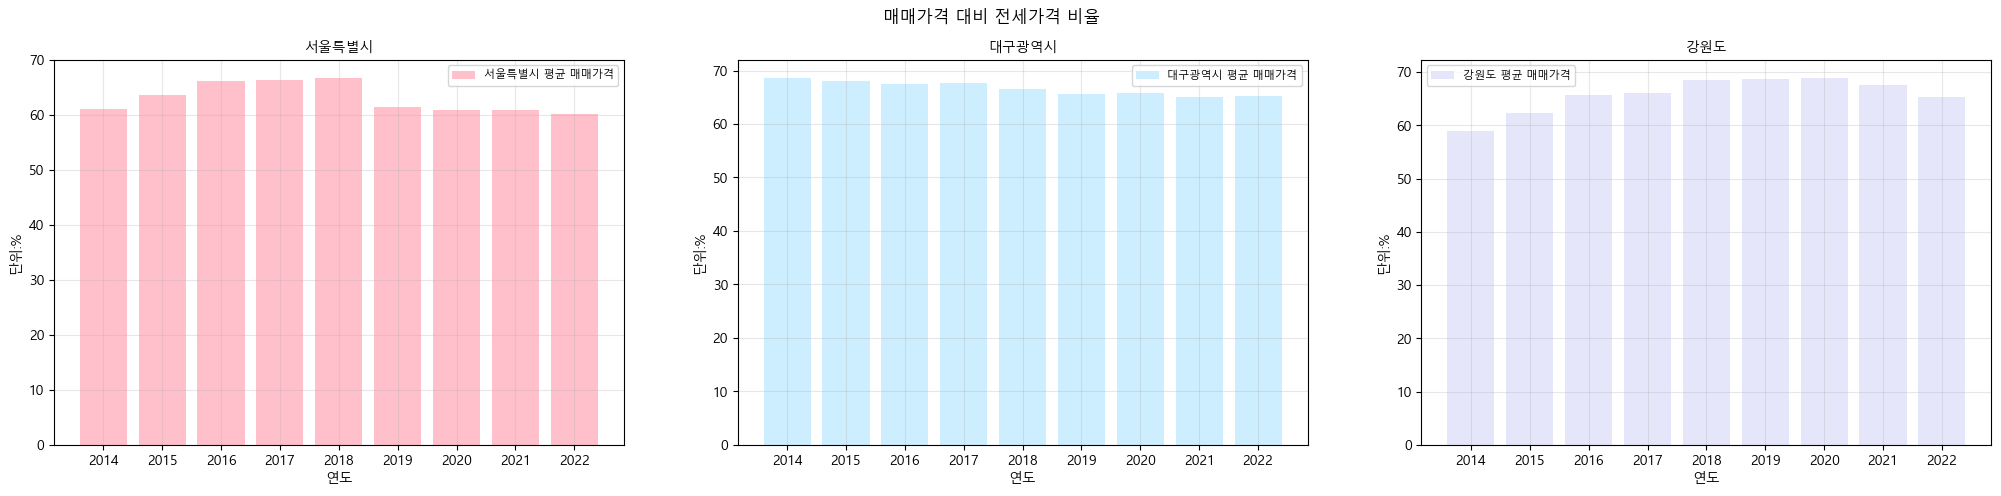

In [63]:
fig = plt.figure(figsize=(25,5))


draw_price_year_file(price_year_df_t, '서울특별시', 1, fig)


draw_price_year_file(price_year_df_t,'대구광역시',2,fig,'#CCEEFF')


draw_price_year_file(price_year_df_t,'강원도',3,fig,'#E6E6FA')

plt.suptitle('매매가격 대비 전세가격 비율')

plt.savefig('data/매매가격 대비 전세가격 비율.png')
plt.show()

In [64]:
# 착공 데이터 불러오기
start_df = pd.read_csv('data/착공_최종.csv')

start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8 non-null      object
 1   2011        8 non-null      int64 
 2   2012        8 non-null      int64 
 3   2013        8 non-null      int64 
 4   2014        8 non-null      int64 
 5   2015        8 non-null      int64 
 6   2016        8 non-null      int64 
 7   2017        8 non-null      int64 
 8   2018        8 non-null      int64 
 9   2019        8 non-null      int64 
 10  2020        8 non-null      int64 
 11  2021        8 non-null      int64 
 12  2022        8 non-null      int64 
dtypes: int64(12), object(1)
memory usage: 960.0+ bytes


In [65]:
start_df.set_index('Unnamed: 0',inplace=True)

start_index_list = list(start_df.index)
start_df.index = start_index_list

start_df['평균'] = round(start_df.mean(axis=1),1)

In [66]:
he_start_df = pd.merge(he_df,start_df['평균'], how='inner',left_index=True,	right_index=True)

he_start_df.columns = ['매매 평균', '전세 평균', '착공 평균']

he_start_df

,매매 평균,전세 평균,착공 평균
서울특별시,744.8,578.8,74663.4
부산광역시,287.3,281.5,30204.4
대구광역시,275.3,293.0,21228.5
광주광역시,219.1,239.8,12825.7
대전광역시,263.1,255.5,10648.6
울산광역시,257.4,245.0,9020.4
강원도,167.1,180.6,16701.8
제주특별자치도,270.4,268.3,9641.8


<AxesSubplot: title={'center': '상관계수'}>

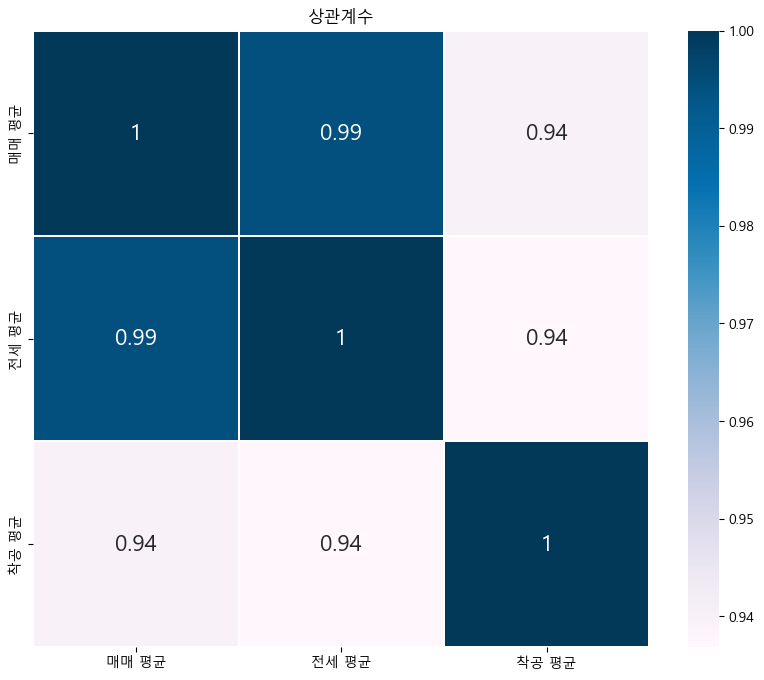

In [67]:
# 매매평균, 전세평균, 착공 데이터 상관계수
colormap = plt.cm.PuBu

plt.figure(figsize=(10,8))
plt.title('상관계수')
sns.heatmap(he_start_df.corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [68]:
price_df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,평균
서울특별시,442.7,450.4,551.1,633.2,609.2,586.4,567.7,556.9,574.2,610.8,663.3,765.8,806.9,1000.1,1105.6,1387.6,1349.3,744.8
부산광역시,150.1,157.3,164.4,183.3,208.7,255.7,258.6,263.2,277.2,299.3,330.5,352.9,351.4,372.9,416.5,419.2,423.6,287.3
대구광역시,167.6,165.3,166.7,171.3,173.0,199.5,221.7,246.8,282.5,323.5,321.3,340.0,361.0,355.8,397.8,392.5,394.1,275.3
광주광역시,113.9,117.8,123.6,129.9,135.9,167.5,182.5,193.5,211.9,234.9,249.2,265.1,281.4,286.5,325.6,353.7,352.5,219.1
대전광역시,173.1,161.2,161.9,180.8,202.8,239.5,237.0,244.1,250.6,255.0,265.1,278.4,297.3,316.2,376.8,427.9,405.4,263.1
울산광역시,138.8,164.7,169.5,181.4,191.3,216.7,245.5,251.6,268.3,289.7,311.9,313.8,295.3,306.6,345.6,340.4,344.7,257.4
강원도,99.0,100.2,110.2,117.3,124.7,144.0,150.6,156.9,160.4,174.2,194.0,204.7,199.7,193.8,213.5,243.4,254.0,167.1
제주특별자치도,119.4,129.4,133.5,148.5,161.3,184.9,198.4,210.7,234.0,298.4,368.0,388.0,387.8,380.7,396.8,429.3,427.0,270.4


In [69]:
# 착공 대비 매매 전세 가격 그래프
def draw_price_start(start_df,price_df,country,num,fig, colors='pink',lo='best'):
    ax1 = fig.add_subplot(1,3,num)
    
    if isinstance(lo[0],float) and isinstance(lo[1],float):
        re_lo = (lo[0],lo[1]-0.075)
    else:
        re_lo = lo
        
    plt.bar(start_df.columns[3:-1],start_df.loc[country][3:-1], color=colors,label=f'{country} 착공')
    plt.legend(fontsize=10, loc=re_lo)
    plt.xlabel('연도', fontsize=10)
    plt.ylabel('착공(단위: 호)')
    

    ax2 = ax1.twinx()
    plt.plot(start_df.columns[3:-1],price_df.loc[country][8:-1], 'ro-',label=f'{country} 평균 매매가격')
    plt.plot(start_df.columns[3:-1],year_df.loc[country][:-1],'bo-', label=f'{country} 평균 전세가격')
    plt.legend(fontsize=10, loc=lo)
    plt.ylabel('금액(단위: 만원/㎡)', fontsize=10)
    
    plt.title(f'{country}', fontsize=10)
    plt.grid(alpha=0.3)


    

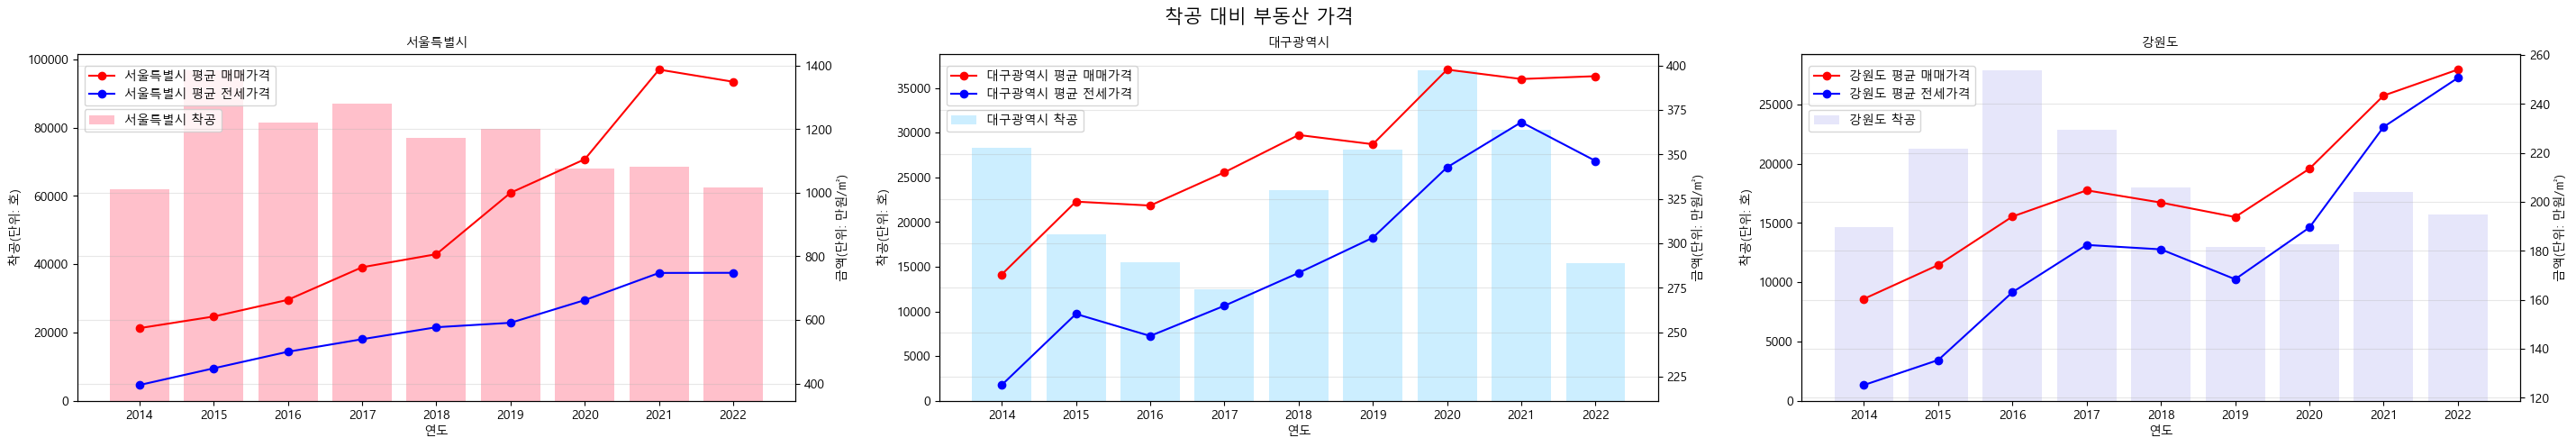

In [70]:
fig = plt.figure(figsize=(35,5))


draw_price_start(start_df,price_df,'서울특별시',1,fig,lo=(0.01,0.85))

draw_price_start(start_df,price_df,'대구광역시',2,fig,colors='#CCEEFF',lo=(0.01,0.85))

draw_price_start(start_df,price_df,'강원도',3,fig,colors='#E6E6FA',lo=(0.01,0.85))

plt.suptitle('착공 대비 부동산 가격',fontsize=15)

plt.savefig('data/착공 대비 부동산 가격.png')
plt.show()

In [71]:
# 미분양 데이터 불러오기
not_sell_df = pd.read_csv('data/미분양_최종.csv')

not_sell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8 non-null      object
 1   2007        8 non-null      int64 
 2   2008        8 non-null      int64 
 3   2009        8 non-null      int64 
 4   2010        8 non-null      int64 
 5   2011        8 non-null      int64 
 6   2012        8 non-null      int64 
 7   2013        8 non-null      int64 
 8   2014        8 non-null      int64 
 9   2015        8 non-null      int64 
 10  2016        8 non-null      int64 
 11  2017        8 non-null      int64 
 12  2018        8 non-null      int64 
 13  2019        8 non-null      int64 
 14  2020        8 non-null      int64 
 15  2021        8 non-null      int64 
 16  2022        8 non-null      int64 
dtypes: int64(16), object(1)
memory usage: 1.2+ KB


In [72]:
not_sell_df.set_index('Unnamed: 0',inplace=True)

not_sell_index_list = list(not_sell_df.index)
not_sell_df.index = not_sell_index_list

not_sell_df['평균'] = round(not_sell_df.mean(axis=1),1)

In [73]:
# 미분양 대비 전세가격
def draw_year_not_sell(not_sell_df,year_df,country,num,fig, colors='pink',lo='best'):
    ax1 = fig.add_subplot(1,3,num)
    
    if isinstance(lo[0],float) and isinstance(lo[1],float):
        re_lo = (lo[0],lo[1]-0.075)
    else:
        re_lo = lo
        
    plt.bar(year_df.columns[:-1],not_sell_df.loc[country][7:-1], color=colors,label=f'{country} 미분양')
    plt.legend(fontsize=10, loc=re_lo)
    plt.xlabel('연도', fontsize=10)
    plt.ylabel('미분양(단위: 호)')

    ax2 = plt.twinx()
    ax2.plot(year_df.columns[:-1],year_df.loc[country][:-1], 'ro-',label=f'{country} 평균 전세가격')
    ax2.plot()
    plt.legend(fontsize=10, loc=lo)
    plt.ylabel('금액(단위: 만원/㎡)', fontsize=10)
    
    plt.title(f'{country}', fontsize=10)
    plt.grid(alpha=0.3)

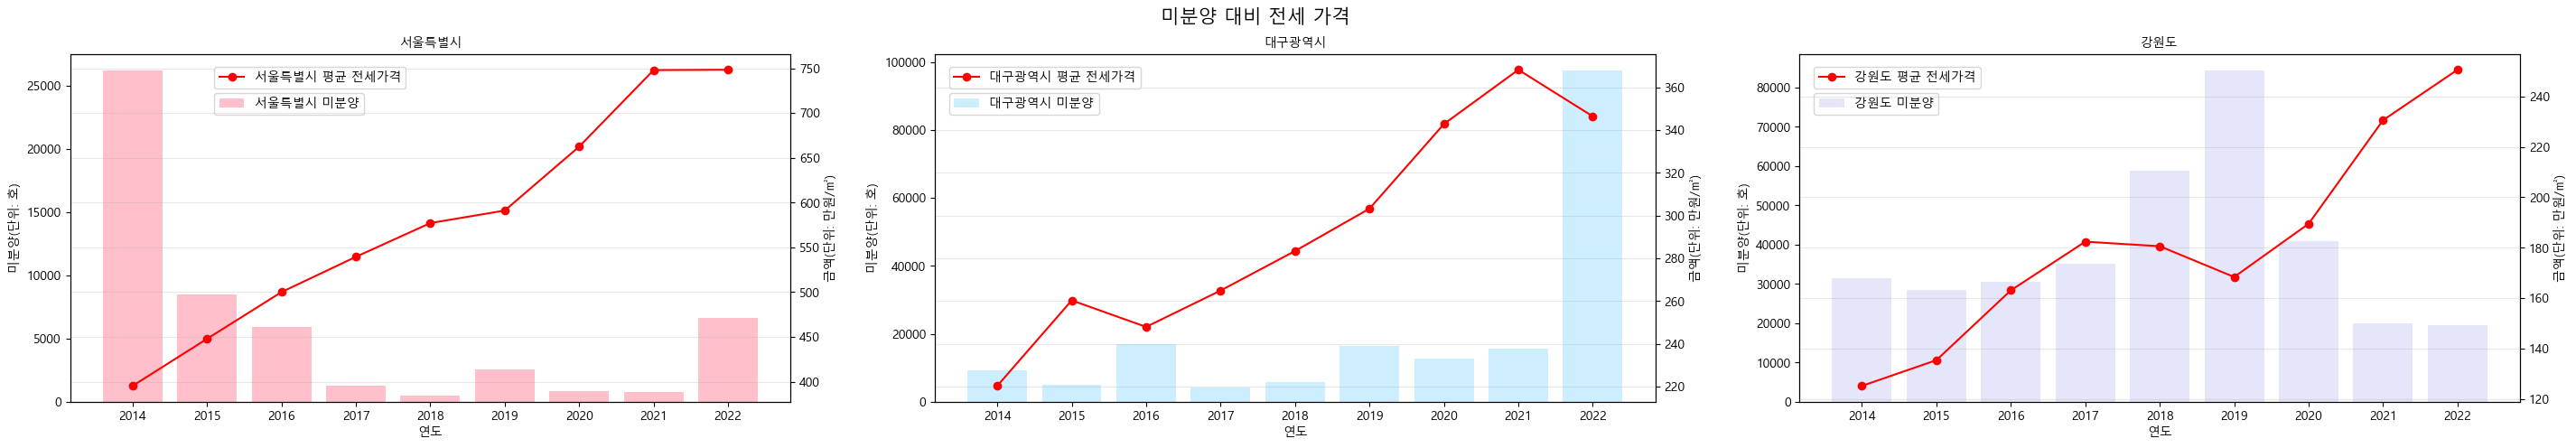

In [74]:
fig = plt.figure(figsize=(35,5))


draw_year_not_sell(not_sell_df,year_df,'서울특별시',1,fig,lo=(0.2,0.9))

draw_year_not_sell(not_sell_df,year_df,'대구광역시',2,fig,colors='#CCEEFF',lo=(0.02,0.9))

draw_year_not_sell(not_sell_df,year_df,'강원도',3,fig,colors='#E6E6FA',lo=(0.02,0.9))

plt.suptitle('미분양 대비 전세 가격',fontsize=15)

plt.savefig('data/미분양 대비 전세 가격.png')
plt.show()

In [75]:
# 매매 실거래 가격지수 
ra = pd.read_csv('data/아파트_매매_실거래가격지수.csv', encoding='euc-kr')

ra.drop('항목', axis=1, inplace=True)

ra['시점'] = ra['시점'].astype(str)

ra['시점'] = ra['시점'].str[:4]

ra.rename(columns={'시점':'연도'}, inplace=True)
ra = round(ra.groupby('연도').mean(),)
ra.to_csv('data/매매 실거래가격지수 최종.csv')

ra

,전국
연도,
2006,64.0
2007,73.0
2008,77.0
2009,76.0
2010,78.0
2011,84.0
2012,84.0
2013,84.0
2014,88.0


In [76]:
# 지가 변동률 데이터 불러오기
land = pd.read_csv('data/land_price.csv')

land.set_index('시점',inplace=True)
land = land.T

land.drop('전국', axis=0, inplace=True)

land

시점,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
서울특별시,0.531667,0.733917,0.477500,-0.073917,0.116333,0.044000,0.080167,0.031500,0.100000,0.219250,0.221333,0.244500,0.352833,0.495750,0.430167,0.391833,0.432167,0.251917
부산광역시,0.153833,0.205583,0.178583,-0.013083,0.009083,0.100667,0.130667,0.143167,0.129750,0.187917,0.254250,0.341417,0.526750,0.466250,0.308250,0.307250,0.330667,0.226250
대구광역시,0.272333,0.342250,0.239417,-0.035917,0.023917,0.116083,0.115750,0.131000,0.138750,0.258667,0.332083,0.321833,0.373917,0.408250,0.371667,0.279417,0.357583,0.210250
광주광역시,0.154167,0.119333,0.078083,-0.074083,0.027750,0.055417,0.062333,0.095417,0.062000,0.108750,0.236083,0.232250,0.341500,0.427917,0.388917,0.318000,0.284500,0.187500
대전광역시,0.550333,0.339750,0.122667,-0.080083,0.021750,0.128333,0.121583,0.103833,0.083917,0.152417,0.255833,0.282750,0.276083,0.274250,0.347417,0.373667,0.381333,0.211333
울산광역시,0.170333,0.241667,0.238750,-0.021583,0.025667,0.061167,0.090750,0.136167,0.113333,0.152833,0.207583,0.193750,0.290500,0.217833,0.029083,0.135250,0.190917,0.174917
강원도,0.216833,0.207667,0.137583,0.031833,0.028500,0.069917,0.117167,0.148000,0.107000,0.146083,0.217583,0.240500,0.312833,0.293417,0.218500,0.177917,0.249083,0.187583


In [81]:
# 매매가격 대비 지가 변동률 그래프
def draw_land_year(price_df,land_df, country,num,fig,colors='pink',lo='best'):

    ax1 = fig.add_subplot(1,3,num)

    if isinstance(lo[0],float) and isinstance(lo[1],float):
        re_lo = (lo[0],lo[1]-0.075)
    else:
        re_lo = lo

    plt.bar(price_df.columns[:-1],price_df.loc[country][:-1], color=colors,label=f'{country} 평균 매매가격')
    plt.legend(fontsize=10, loc=re_lo)
    plt.xlabel('연도', fontsize=10)
    plt.ylabel('금액(단위: 만원/㎡)')

    ax2 = ax1.twinx()
    ax2.plot(price_df.columns[:-1],land_df.loc[country][1:], 'ro-',label=f'{country} 지가 변동률')
    plt.legend(fontsize=10, loc=lo)
    plt.ylabel('단위 : %', fontsize=10)
    
    plt.title(f'{country}', fontsize=10)
    plt.grid(alpha=0.3)


C:\Users\user\AppData\Local\Temp\ipykernel_39536\1456839524.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax2.plot(price_df.columns[:-1],land_df.loc[country][1:], 'ro-',label=f'{country} 지가 변동률')
C:\Users\user\AppData\Local\Temp\ipykernel_39536\1456839524.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax2.plot(price_df.columns[:-1],land_df.loc[country][1:], 'ro-',label=f'{country} 지가 변동률')
C:\Users\user\AppData\Local\Temp\ipykernel_39536\1456839524.py:17: FutureWarni

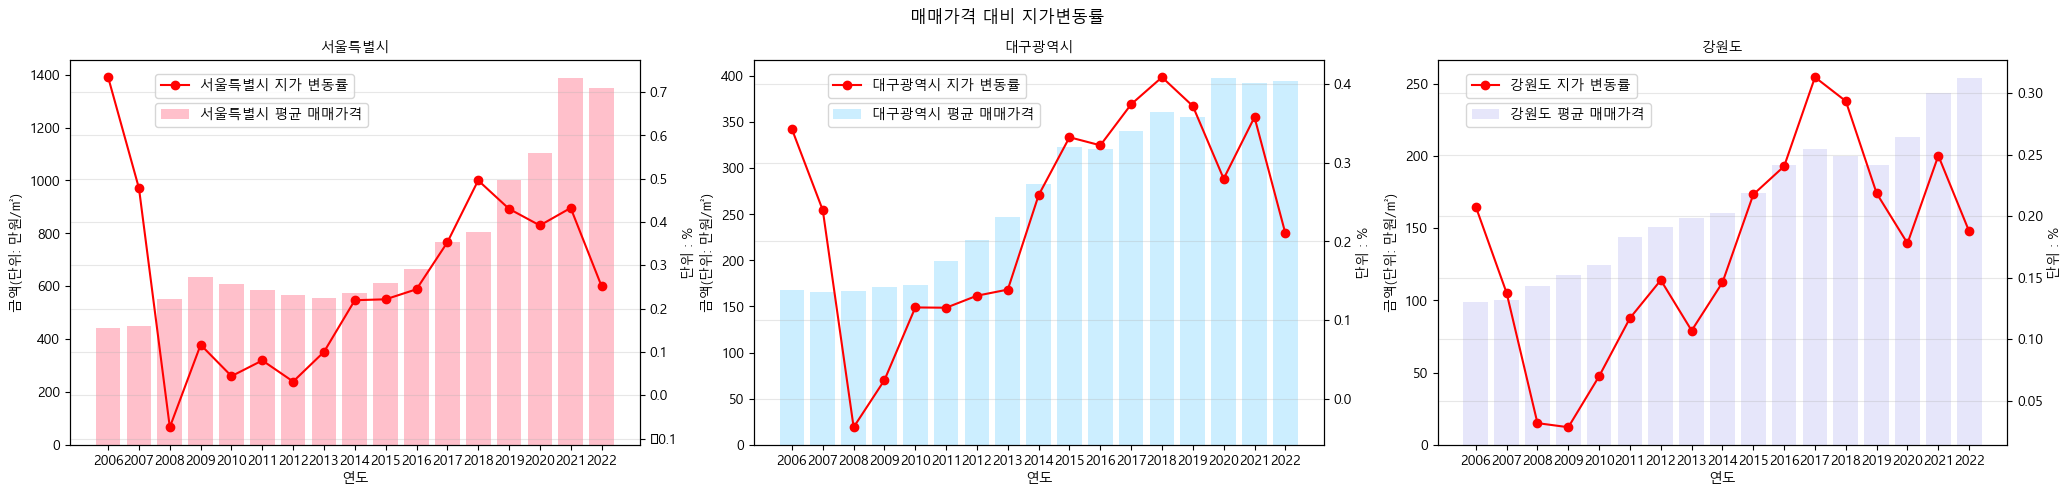

In [82]:
fig = plt.figure(figsize=(25,5))


draw_land_year(price_df,land,'서울특별시',1,fig,lo=(0.15,0.9))


draw_land_year(price_df,land,'대구광역시',2,fig,'#CCEEFF',lo=(0.13,0.9))


draw_land_year(price_df,land,'강원도',3,fig,'#E6E6FA',lo=(0.05,0.9))

plt.suptitle('매매가격 대비 지가변동률')

plt.savefig('data/매매가격 대비 지가변동률.png')
plt.show()